### Tweets Emotions Recognition : 

In [ ]:
!pip install nlp 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 28.3 MB/s 
     |████████████████████████████████| 212 kB 68.9 MB/s 


In [ ]:
# import dependencies : 

import nlp 

import matplotlib.pyplot as plt 

import numpy as np 

import tensorflow as tf 





In [ ]:
data = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
data

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
for d in data : 
  print(d)

train
validation
test


In [ ]:
train = data['train']

test = data['test']

val = data['validation']

In [ ]:
train['text']

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [ ]:
train['label']

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 '

In [ ]:
set(train['label'])

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [ ]:
for i in train: 
  print(i)

Streaming output truncated to the last 5000 lines.
{'label': 'sadness', 'text': 'i feel exhausted just by writing that'}
{'label': 'sadness', 'text': 'im feeling a little regretful but itll pass because thats what happens with regret'}
{'label': 'anger', 'text': 'i feel stressed frequently'}
{'label': 'fear', 'text': 'i can feel the awkwardness and that weird kind of tension'}
{'label': 'love', 'text': 'i know i just ended a very big giveaway here on the muse but im still feeling quite generous'}
{'label': 'joy', 'text': 'i love getting out the decorations and feeling festive i am happy to put them away'}
{'label': 'anger', 'text': 'i point these things out so as to make clear that i went into this film with the best intentions but left feeling irritated confused and wore out'}
{'label': 'sadness', 'text': 'i feel so heartbroken and confused and just blah blah blah'}
{'label': 'sadness', 'text': 'i guess you could say i am a loner but i feel more lonely in a crowed room with boring peo

In [ ]:
def export_data(dataset):

   text = [x['text'] for x in train]

   label = [x['label'] for x in train]

   return text, label 

In [ ]:
tweets, labels = export_data(data)

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

In [ ]:
tweets[1], labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

In [ ]:
tweets[2], labels[2]

('im grabbing a minute to post i feel greedy wrong', 'anger')

### Tokenization :   

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

In [ ]:
tokenizer.fit_on_texts(tweets)

In [ ]:
tweets[0]

'i didnt feel humiliated'

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [ ]:
tokenizer.texts_to_sequences([tweets[1]])

[[2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255]]

#### checking lengths 

In [ ]:
lengths = [ len(t.split(' ')) for t in tweets]

In [ ]:
lengths

[4,
 21,
 10,
 18,
 4,
 12,
 23,
 17,
 19,
 4,
 14,
 21,
 12,
 8,
 42,
 10,
 6,
 8,
 23,
 17,
 12,
 44,
 9,
 27,
 18,
 54,
 15,
 6,
 21,
 9,
 12,
 9,
 23,
 34,
 45,
 12,
 9,
 25,
 29,
 27,
 23,
 27,
 27,
 18,
 30,
 12,
 64,
 22,
 6,
 8,
 12,
 9,
 5,
 20,
 33,
 14,
 45,
 15,
 30,
 19,
 23,
 23,
 23,
 20,
 12,
 39,
 12,
 18,
 28,
 16,
 14,
 20,
 25,
 15,
 19,
 33,
 38,
 13,
 17,
 5,
 8,
 22,
 23,
 9,
 12,
 26,
 22,
 16,
 12,
 21,
 17,
 17,
 31,
 17,
 28,
 11,
 17,
 15,
 17,
 41,
 33,
 9,
 20,
 23,
 33,
 21,
 44,
 36,
 9,
 31,
 30,
 5,
 24,
 49,
 11,
 6,
 10,
 39,
 17,
 15,
 17,
 16,
 26,
 19,
 47,
 13,
 17,
 12,
 42,
 30,
 23,
 37,
 5,
 36,
 31,
 37,
 11,
 24,
 28,
 23,
 17,
 17,
 14,
 7,
 28,
 14,
 18,
 15,
 10,
 43,
 20,
 19,
 14,
 56,
 41,
 14,
 40,
 17,
 22,
 38,
 12,
 32,
 52,
 28,
 6,
 17,
 17,
 15,
 12,
 24,
 29,
 10,
 12,
 15,
 16,
 25,
 19,
 28,
 28,
 18,
 18,
 21,
 9,
 5,
 14,
 23,
 28,
 6,
 25,
 8,
 5,
 18,
 15,
 35,
 20,
 13,
 14,
 22,
 27,
 24,
 19,
 8,
 30,
 13,
 15,
 32,
 

In [ ]:
max(lengths)

66

In [ ]:
min(lengths)

2

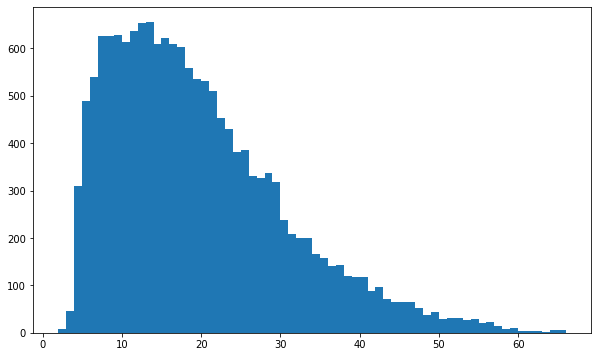

In [ ]:
figure = plt.figure(figsize=(10,6))
plt.hist(lengths, bins=list(set(lengths)))
plt.show()

In [ ]:
maxlen=50

### Padding & truncating : 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def padding(tokenizer, tweets):

   sequences = tokenizer.texts_to_sequences(tweets)

   padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=maxlen)

   return padded 


In [ ]:
padded = padding(tokenizer, tweets)

In [ ]:
padded[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
len(padded[0])

50

### Preparing Labels : 

In [ ]:
L = set(labels)

In [ ]:
L

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [ ]:
n_to_i = dict( (n,i)  for i,n in enumerate(L) )

In [ ]:
n_to_i

{'anger': 1, 'fear': 4, 'joy': 5, 'love': 0, 'sadness': 3, 'surprise': 2}

In [ ]:
i_to_n = dict( (k,j) for j,k in n_to_i.items())

In [ ]:
i_to_n

{0: 'love', 1: 'anger', 2: 'surprise', 3: 'sadness', 4: 'fear', 5: 'joy'}

In [ ]:
name_to_index = lambda  labels : np.array([n_to_i.get(x) for x in labels])

In [ ]:
for x in labels :
  print(n_to_i.get(x))

Streaming output truncated to the last 5000 lines.
3
3
1
4
0
5
1
3
3
5
4
5
4
0
0
1
1
3
4
3
3
2
0
5
5
0
3
5
5
4
3
1
1
3
0
4
4
1
1
5
3
3
5
5
4
3
5
0
4
1
3
5
1
2
4
5
5
0
4
3
5
1
4
1
3
3
3
1
3
4
5
1
1
3
4
5
1
4
3
5
4
5
0
1
4
4
4
4
5
1
1
3
5
3
5
3
3
5
3
4
4
5
3
5
3
5
4
1
3
5
1
5
5
3
5
5
1
1
5
5
5
3
5
5
5
1
1
5
0
5
0
5
5
5
3
5
3
2
3
1
1
1
4
4
5
4
4
5
1
5
5
5
0
5
4
3
3
2
3
3
1
5
0
4
5
1
5
2
1
4
3
5
3
5
3
0
4
3
3
2
5
1
1
3
2
1
5
4
3
4
5
5
4
3
5
5
5
4
3
0
4
0
3
1
0
3
5
5
5
4
3
1
4
0
5
0
1
3
5
5
0
3
5
3
5
3
3
4
1
5
3
5
3
5
5
3
2
5
5
1
5
5
4
5
3
3
4
1
3
5
3
3
5
1
3
3
4
3
5
2
3
5
3
1
1
4
5
5
4
4
0
3
0
5
3
5
5
5
1
2
5
1
1
1
5
3
4
1
5
3
3
4
5
5
1
3
5
4
5
3
3
5
5
3
3
3
2
0
2
5
5
5
5
0
5
3
4
4
3
1
5
5
4
3
3
3
4
5
0
1
3
5
5
5
3
0
3
5
5
3
5
5
3
3
5
4
3
5
5
3
5
3
3
5
0
5
3
3
3
0
5
5
5
2
5
1
5
3
5
5
4
1
5
3
5
3
3
3
5
5
3
5
2
5
3
2
4
5
5
3
3
2
3
4
4
1
2
0
2
1
5
5
5
3
5
5
3
1
3
3
3
5
4
5
5
5
3
5
3
5
3
3
4
5
5
3
5
5
1
5
5
3
5
3
4
1
5
5
1
5
3
0
1
5
3
0
4
1
5
3
3
5
5
4
3
3
0
3
1
5
3
1
3
3
5
4
2
4
5
3
5
1
2
3
1

In [ ]:
labels_train = name_to_index(labels)

In [ ]:
labels_train[0]

3

In [ ]:
tweets[0],labels_train[0]

('i didnt feel humiliated', 3)

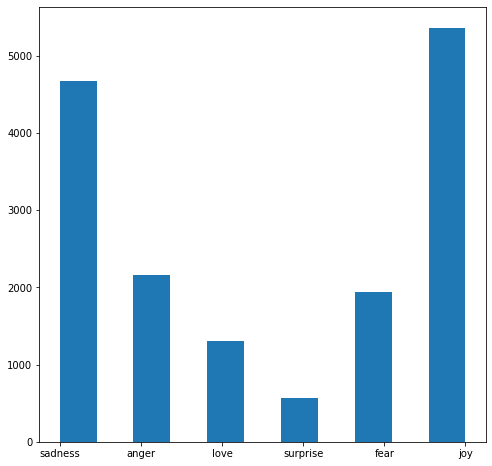

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(labels, bins=11)
plt.show()

### Creating The Model :     

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax'),
    
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
    
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


### Validation set : 


In [ ]:

valid_tweets, valid_labels = export_data(val)

In [ ]:
valid_tweets[0], valid_labels[0]

('i didnt feel humiliated', 'sadness')

In [55]:

padded_valid_tweets = padding(tokenizer, valid_tweets)

valid_labels = name_to_index(valid_labels)

In [56]:
valid_tweets[0], valid_labels[0]

('i didnt feel humiliated', 3)

In [58]:
n_to_i

{'anger': 1, 'fear': 4, 'joy': 5, 'love': 0, 'sadness': 3, 'surprise': 2}

In [59]:
m = model.fit(
    padded, labels_train,
    validation_data=(padded_valid_tweets, valid_labels),
    epochs=20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 18s 18ms/step - loss: 1.3665 - accuracy: 0.4277 - val_loss: 0.7830 - val_accuracy: 0.6984
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.6482 - accuracy: 0.7406 - val_loss: 0.4758 - val_accuracy: 0.8153
Epoch 3/20
500/500 [==============================] - 8s 15ms/step - loss: 0.4155 - accuracy: 0.8505 - val_loss: 0.2780 - val_accuracy: 0.9074
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2930 - accuracy: 0.8985 - val_loss: 0.2364 - val_accuracy: 0.9261
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2340 - accuracy: 0.9269 - val_loss: 0.1709 - val_accuracy: 0.9507
Epoch 6/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1759 - accuracy: 0.9446 - val_loss: 0.1269 - val_accuracy: 0.9617
Epoch 7/20
500/500 [==============================] - 8s 15ms/step - loss: 0.1360 - accuracy: 0.9572 - val_loss: 0.1071 - val_accuracy: 0.967

In [60]:
### Model evaluation : 

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

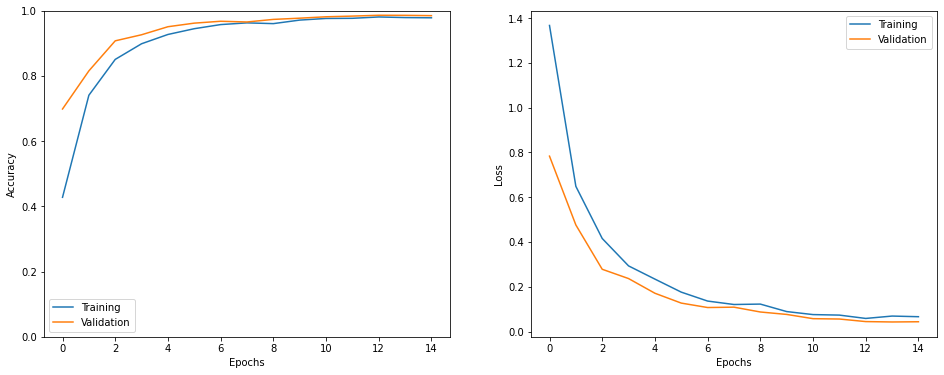

In [61]:
show_history(m)

In [62]:
### Test : 

test_tweets, test_labels = export_data(test)

padded_test_tweets = padding(tokenizer, test_tweets)

test_labels = name_to_index(test_labels)


In [63]:
k = model.evaluate(padded_test_tweets, test_labels)

500/500 [==============================] - 3s 5ms/step - loss: 0.0436 - accuracy: 0.9846


In [65]:
len(test_labels)-1

15999

In [66]:
len(test_tweets)-1

15999

In [73]:
import random 

n = random.randint(0, len(test_labels)-1)

print("Tweet : ",test_tweets[n])

print("emotion : ",i_to_n[test_labels[n]])

prediction = model.predict(np.expand_dims(padded_test_tweets[n], axis=0))[0]

pred_class = i_to_n[np.argmax(prediction).astype('uint8')]

print()
print()

print("Predicted Class : ",pred_class)


Tweet :  i feel like these lenses look so cute
emotion :  joy


Predicted Class :  joy
